In [ ]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


load training data from .dat files
raw_data_imaginary_x.dat --> train_imag
raw_data_real_x.dat      --> train_real

In [ ]:
# if IS_TRAINING == True, a new model will be compiled 
# and trained from the dataset
#
# if IS_TRAINING == False, an existing model will be 
# loaded and tested against the dataset
IS_TRAINING = True

# trainingset to be trained or loaded
trainingset_number = 9

# model params
neuron_number = 8
activation_function = 'tanh'

# training params
iterations = 50
learning_rate= 10e-4

checkpoint_path = "./training_" + str(trainingset_number) + "/cp_training_weights_only.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)




In [ ]:
#os.mkdir("./training_" + str(trainingset_number))


In [ ]:
# filename_raw_data_real = "raw_data_real_" + str(trainingset_number) + ".dat"
# filename_raw_data_imag = "raw_data_imaginary_" + str(trainingset_number) + ".dat"

filename_dataset_csv = "training_data_" + str(trainingset_number) + ".csv"
filename_dataset_csv = "/content/drive/MyDrive/Colab Notebooks/" + "training_data_" + str(trainingset_number) + ".csv"


dataset_array_numpy = np.loadtxt(filename_dataset_csv,
  dtype=float, 
  delimiter=',',
  skiprows=1) # ignore header line




In [ ]:
if IS_TRAINING:
    FC_layer = tf.keras.layers.Dense(units=neuron_number, activation=activation_function, input_shape=(2,)) # dense layer == fully connected layer    
       
    input_layer = tf.keras.layers.Dense(units=2, input_dim=2, activation=activation_function)
    output_layer = tf.keras.layers.Dense(units=2, activation=activation_function)

In [ ]:
# create the model
if IS_TRAINING:
    model = tf.keras.Sequential([FC_layer, output_layer])


In [ ]:
# loss function
# as described in article: MSE mean squared error
# batches have the format:
# [batch_real, batch_imag]
def my_loss_fcn(ground_truth_batch, predicted_batch):   
    result = tf.square(predicted_batch[:,0] - ground_truth_batch[:,0])
    result = result + tf.square(predicted_batch[:,1] - ground_truth_batch[:,1])
    N = len(ground_truth_batch[:,0])    
    sum = tf.reduce_sum(result)
    result = sum / tf.cast(N, tf.float32)
    return result  

In [ ]:
# compile the keras model
# loss=tf.keras.losses.MeanSquaredError()
# loss='mse'
# loss=my_loss_fcn
if IS_TRAINING:
    model.compile(loss=my_loss_fcn, 
    optimizer=tf.keras.optimizers.Adam(learning_rate), 
    metrics=['accuracy',
    tf.keras.metrics.RootMeanSquaredError(),
    tf.keras.metrics.CategoricalCrossentropy(),
    tf.keras.metrics.BinaryCrossentropy()])    

    print("Successfully compiled new model.")

Successfully compiled new model.


In [ ]:
# load model from file if not training
if not IS_TRAINING:
    model = tf.keras.models.load_model("./training_" + str(trainingset_number) + "/saved_trained_model")
    print("Successfully loaded existing model.")

In [ ]:
# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

In [ ]:
# create the input and target data and print its' shapes
percentage_of_dataset_used_for_training = 10

nmbr = int(len(dataset_array_numpy) * (percentage_of_dataset_used_for_training/100))
training_data = dataset_array_numpy[0:nmbr, :]

print(np.shape(training_data))

input_data = training_data[:][:,0:2]
target_data = training_data[:][:,2:4]

print(np.shape(input_data))

(637500, 4)
(637500, 2)


In [ ]:

# fit the keras model on the dataset
#
# train the model by slicing the data into "batches" of size batch_size,
# and repeatedly iterating over the entire dataset 
# for a given number of epochs
if IS_TRAINING:
    history = model.fit(        
        input_data, 
        target_data,
        batch_size=32,
        callbacks=[cp_callback],
        epochs=iterations)

Epoch 1/50
19910/19922 [============================>.] - ETA: 0s - loss: 2.6932e-04 - accuracy: 0.9927 - root_mean_squared_error: 0.0116 - categorical_crossentropy: -0.0168 - binary_crossentropy: -0.3829
Epoch 1: saving model to ./training_9/cp_training_weights_only.ckpt
19922/19922 [==============================] - 35s 2ms/step - loss: 2.6916e-04 - accuracy: 0.9927 - root_mean_squared_error: 0.0116 - categorical_crossentropy: -0.0167 - binary_crossentropy: -0.3829
Epoch 2/50
19902/19922 [============================>.] - ETA: 0s - loss: 1.6706e-06 - accuracy: 0.9982 - root_mean_squared_error: 9.1394e-04 - categorical_crossentropy: -0.0180 - binary_crossentropy: -0.3874
Epoch 2: saving model to ./training_9/cp_training_weights_only.ckpt
19922/19922 [==============================] - 32s 2ms/step - loss: 1.6703e-06 - accuracy: 0.9982 - root_mean_squared_error: 9.1387e-04 - categorical_crossentropy: -0.0180 - binary_crossentropy: -0.3874
Epoch 3/50
19919/19922 [========================

(20000, 2)
[[ 0.07666045  0.26262927]
 [ 0.0246479  -0.10022125]
 [ 0.10813624 -0.10801378]
 ...
 [ 0.11559098  0.12431526]
 [-0.04268624  0.01437598]
 [-0.0661485  -0.11434904]]


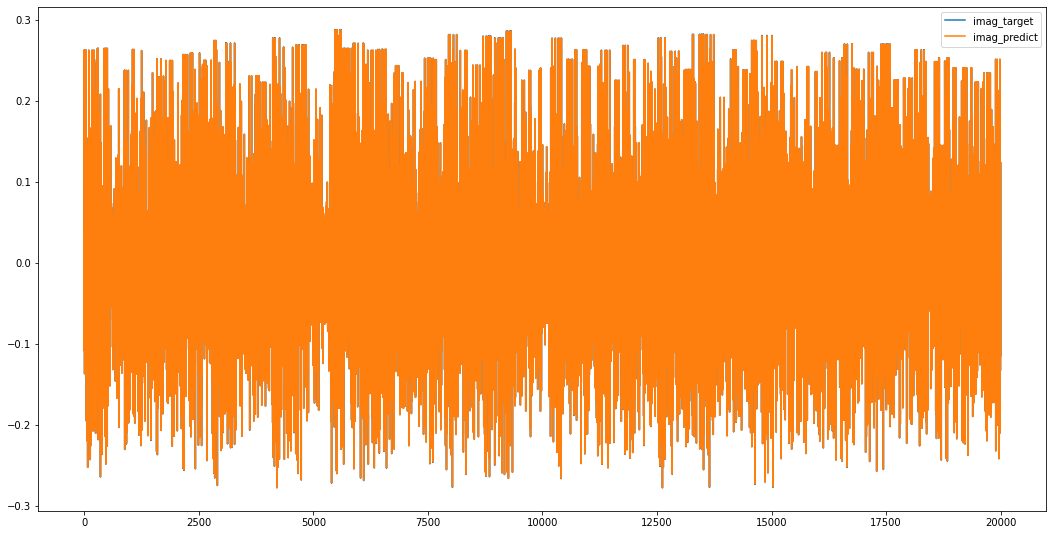

In [ ]:
# plot predict vs target
sample_count_plot = 20000

nn_result = model.predict(dataset_array_numpy[0:sample_count_plot][:,0:2]) # use sample_count_plot rows of data to predict sample_count_plot outputs
target_result = dataset_array_numpy[0:sample_count_plot][:,2:4]
raw = dataset_array_numpy[0:sample_count_plot][:,0:2]

x_range_plot = range(sample_count_plot)
#print(dataset_array_numpy[0:sample_count_plot][:,2:4])
print(np.shape(nn_result))
print(nn_result)

fig1 = plt.figure(figsize=(14, 7))
# arguments of add_axes are overwritten by plt.xlim and plt.ylim
ax1 = fig1.add_axes([-20, 0, 1,1])

#ax1.plot(x_range_plot, raw[:,0], label="real_input")
#ax1.plot(x_range_plot, raw[:,1], label="imag_input")
#ax1.plot(x_range_plot, target_result[:,0], label="real_target")
ax1.plot(x_range_plot, target_result[:,1], label="imag_target")
#ax1.plot(x_range_plot, nn_result[:,0], label="real_predict")
ax1.plot(x_range_plot, nn_result[:,1], label="imag_predict")
ax1.legend()
plt.show()


In [ ]:
# predict the whole dataset
nn_result = model.predict(dataset_array_numpy[:][:,0:2]) # use sample_count_plot rows of data to predict sample_count_plot outputs


In [ ]:
# create the reference target array for the whole dataset
target_result = dataset_array_numpy[:][:,2:4]


In [ ]:
# convert that to complex numbers (to be used in PAPR calculation algorithm below)
print(nn_result)
total_time = np.vectorize(complex)(nn_result[:][:,0], nn_result[:][:,1])
print(total_time)

In [ ]:
# the file created in this block can be imported by the 'plot_ccdf.ipynb' script

filename_papr_data = "papr_data_predict_" + str(trainingset_number) + ".dat"


title_info = "16qam_256_subcarriers_clipping_2.4_nopilot_predict"

# create header of the file with title info
my_file = open(filename_papr_data, "w")
my_file.write(title_info + "\n")
my_file.close()

# calculate PAPR
batch_size = 1024

number_of_samples = int(len(total_time) / batch_size)
my_range = range(number_of_samples)
print(my_range)
sample_number = 0

for i in my_range:
           
    OFDM_time = total_time[sample_number*batch_size:sample_number*batch_size+batch_size]
    #print(OFDM_time)
    # compute the PAPR of the time-domain signal sample
    power_peak = max(np.square(abs(OFDM_time)))
    power_mean = np.mean(np.square(abs(OFDM_time)), dtype=np.float64)

    # decibel above average power
    PAPR = 10* np.log10(power_peak / power_mean)

    print("progress: " + str(sample_number)+ "/" +str(number_of_samples))

    # increment counter
    sample_number=sample_number+1

    # Now, we save the resulting PAPR value to a file for further processing.
   
    ## append to file
    my_file = open(filename_papr_data, "a")
    my_file.write(str(PAPR) + "\n")
    my_file.close()

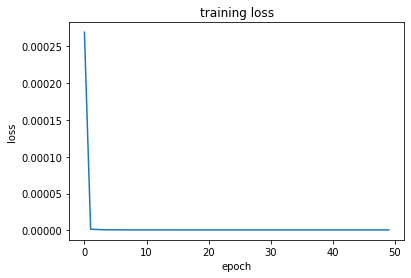

In [ ]:
# plot the training loss

plt.plot(history.history['loss'])
#plt.plot(history.history['val_acc'])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['training accuracy'], loc='upper left')
plt.show()

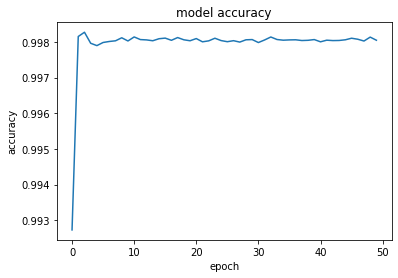

In [ ]:
# plot the training accuracy

plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['training accuracy'], loc='upper left')
plt.show()

In [ ]:
# test the dataset against the loaded model
#if not IS_TRAINING:
#    model.evaluate()
evaluation = model.evaluate(dataset_array_numpy[:, 0:2], dataset_array_numpy[:, 2:4], batch_size=32)

199219/199219 [==============================] - 405s 2ms/step - loss: 5.2732e-07 - accuracy: 0.9982 - root_mean_squared_error: 5.1348e-04 - categorical_crossentropy: -0.0188 - binary_crossentropy: -0.3842


In [ ]:
print(evaluation)

[0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# save the model in the correct directory
if IS_TRAINING:
    model.save("./training_" + str(trainingset_number) + "/saved_trained_model")

# However, model.save() only saves the model structure and the updated weights. 
# And it does not store any loss function weights and information of the loss function. 
# Therefore, you should avoid re-training your model after loading it from the saved file.
#
# If you are willing to further re-train your model, you should use
# tf.keras.models.save_model() to save a model, and tf.keras.models.load_model() 
# to load a model. Further information can be found in the Keras documentation.
if IS_TRAINING:
  tf.keras.models.save_model(model,"./training_" + str(trainingset_number) + "/saved_trained_model_tf_keras")

INFO:tensorflow:Assets written to: ./training_9/saved_trained_model/assets
INFO:tensorflow:Assets written to: ./training_9/saved_trained_model_tf_keras/assets
